## Import Libraries

In [1]:
import sys
sys.path.append("..") # so we can import espresso from the directory above.
import os

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import bootstrap_contrast as bsc

import espresso as esp

/Users/josesho/anaconda3/envs/py3.6/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Create Espresso Instances

In [3]:
data_folder='/Users/josesho/bin/git-repos/espresso/data'

mb312b_folder=os.path.join(data_folder,'by_genotype/MB312B')
mb213b_folder=os.path.join(data_folder,'by_genotype/MB213B')

mb312b=esp.espresso(mb312b_folder)
mb213b=esp.espresso(mb213b_folder)

## Plot Development

In [4]:
mb213b

4 feedlogs with a total of 120 flies.
3 genotypes ['w1118;MB213B-Gal4' 'MB213B-Gal4>UAS-TrpA1' 'w1118;UAS-TrpA1'].
2 temperatures [22 29].
2 foodtypes ['100mM_Sucrose' '100mM_Sucrose_100mM_Arabinose'].

In [7]:
df=mb213b.feeds.copy()

In [8]:
compare_by='Temperature'
group_by=['Genotype','FoodChoice']
color_by='Genotype'

In [9]:
new_grps=[ i for i in group_by ]

new_grps.append(compare_by)
new_grps.append(color_by)

new_grps=np.unique(new_grps)

In [10]:
new_grps

array(['FoodChoice', 'Genotype', 'Temperature'],
      dtype='<U11')

In [24]:
df.columns

Index(['StartTime', 'StartFrame', 'FeedTubeIdx', 'FlyID', 'ChoiceIdx',
       'AviFile', 'FeedVol_µl', 'FeedDuration_ms', 'Evap-mm3/s', 'Valid',
       'RelativeTime_s', 'ExperimentState', 'FeedVol_nl', 'FeedSpeed_nl/s',
       'FeedDuration_s', 'Genotype', 'Sex', 'Minimum Age', 'Maximum Age',
       'Tube1', 'Tube2', 'Temperature', 'FlyCountInChamber',
       'AverageFeedVolumePerFly_µl', 'AverageFeedCountPerFly',
       'AverageFeedSpeedPerFly_µl/s', 'FoodChoice', 'FeedLog_rawfile'],
      dtype='object')

In [124]:
df[df.FlyID=='2017-02-24_12-05-01_Fly11']

,StartTime,StartFrame,FeedTubeIdx,FlyID,ChoiceIdx,AviFile,FeedVol_µl,FeedDuration_ms,Evap-mm3/s,Valid,...,Maximum Age,Tube1,Tube2,Temperature,FlyCountInChamber,AverageFeedVolumePerFly_µl,AverageFeedCountPerFly,AverageFeedSpeedPerFly_µl/s,FoodChoice,FeedLog_rawfile
213,NaN,NaN,0,2017-02-24_12-05-01_Fly11,0,NIL,NaN,NaN,NaN,False,...,7,100mM_Sucrose,100mM_Sucrose_100mM_Arabinose,22,1,NaN,0.0,NaN,100mM_Sucrose,FeedLog_2017-03-09_13-17-09_MB213B-Gal4-UAS-Tr...
215,NaN,NaN,1,2017-02-24_12-05-01_Fly11,1,NIL,NaN,NaN,NaN,False,...,7,100mM_Sucrose,100mM_Sucrose_100mM_Arabinose,22,1,NaN,0.0,NaN,100mM_Sucrose_100mM_Arabinose,FeedLog_2017-03-09_13-17-09_MB213B-Gal4-UAS-Tr...
214,NaN,NaN,0,2017-02-24_12-05-01_Fly11,0,NIL,NaN,NaN,NaN,False,...,7,100mM_Sucrose,100mM_Sucrose_100mM_Arabinose,22,1,NaN,0.0,NaN,100mM_Sucrose,FeedLog_2017-03-09_13-17-09_MB213B-Gal4-UAS-Tr...
216,NaN,NaN,1,2017-02-24_12-05-01_Fly11,1,NIL,NaN,NaN,NaN,False,...,7,100mM_Sucrose,100mM_Sucrose_100mM_Arabinose,22,1,NaN,0.0,NaN,100mM_Sucrose_100mM_Arabinose,FeedLog_2017-03-09_13-17-09_MB213B-Gal4-UAS-Tr...


In [12]:
total_feeds=pd.DataFrame(df[['FoodChoice', 'Genotype', 'Temperature','FlyID','AverageFeedCountPerFly']]\
                            .groupby(['Temperature','Genotype','FoodChoice','FlyID'])\
                            .sum()\
                            .to_records() )\
            .dropna() # for some reason, groupby produces NaN rows
total_feeds.reset_index(drop=True, inplace=True)
total_feeds.rename(columns={'AverageFeedCountPerFly':'Total Feed Count\nPer Fly'},inplace=True)        
print(len(total_feeds))
total_feeds[total_feeds.FlyID=='2017-02-24_12-05-01_Fly11']

240


,Temperature,Genotype,FoodChoice,FlyID,Total Feed Count Per Fly
0,22,MB213B-Gal4>UAS-TrpA1,100mM_Sucrose,2017-02-24_12-05-01_Fly11,0.0
20,22,MB213B-Gal4>UAS-TrpA1,100mM_Sucrose_100mM_Arabinose,2017-02-24_12-05-01_Fly11,0.0


In [20]:
x=group_by.copy()
x.append(compare_by)

In [21]:
x

['Genotype', 'FoodChoice', 'Temperature']

In [22]:
total_feeds['plot_groups']=esp._munger.join_cols(total_feeds,group_by)
x=group_by.copy()
x.append(compare_by)
total_feeds['plot_groups_with_contrast']=esp._munger.join_cols(total_feeds,x)

In [24]:
total_feeds.plot_groups_with_contrast.unique()

array(['MB213B-Gal4>UAS-TrpA1; 100mM_Sucrose; 22',
       'MB213B-Gal4>UAS-TrpA1; 100mM_Sucrose_100mM_Arabinose; 22',
       'w1118;MB213B-Gal4; 100mM_Sucrose; 22',
       'w1118;MB213B-Gal4; 100mM_Sucrose_100mM_Arabinose; 22',
       'w1118;UAS-TrpA1; 100mM_Sucrose; 22',
       'w1118;UAS-TrpA1; 100mM_Sucrose_100mM_Arabinose; 22',
       'MB213B-Gal4>UAS-TrpA1; 100mM_Sucrose; 29',
       'MB213B-Gal4>UAS-TrpA1; 100mM_Sucrose_100mM_Arabinose; 29',
       'w1118;MB213B-Gal4; 100mM_Sucrose; 29',
       'w1118;MB213B-Gal4; 100mM_Sucrose_100mM_Arabinose; 29',
       'w1118;UAS-TrpA1; 100mM_Sucrose; 29',
       'w1118;UAS-TrpA1; 100mM_Sucrose_100mM_Arabinose; 29'], dtype=object)

In [42]:
idx=[tuple(i) for i in np.array_split(total_feeds.plot_groups_with_contrast.unique(), 6)]

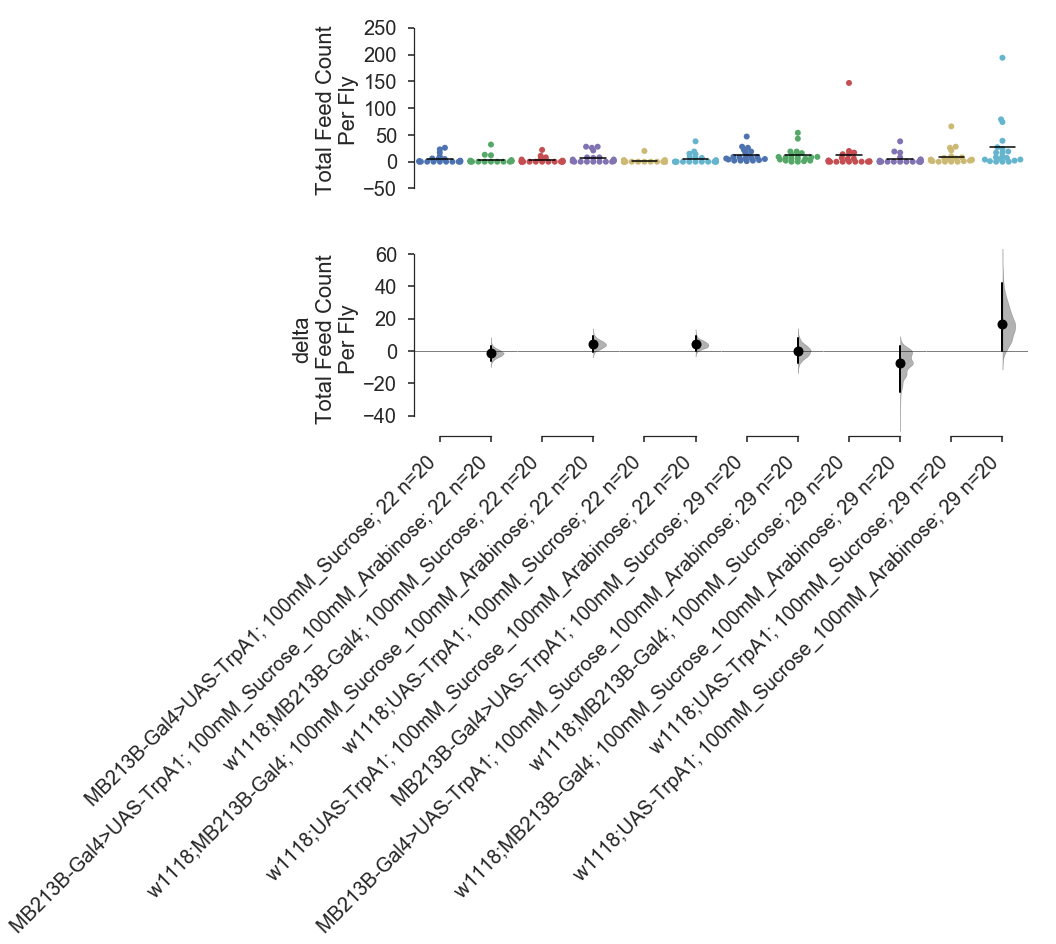

In [41]:
idx=[tuple(i) for i in np.array_split(total_feeds.plot_groups_with_contrast.unique(), 6)]

f,a=bsc.contrastplot(total_feeds,x='plot_groups_with_contrast',y='Total Feed Count\nPer Fly',
                    idx=idx,
                    float_contrast=False)

In [122]:
feed_vol=pd.DataFrame( df[['FlyID','FoodChoice', 'Genotype', 'Temperature','AverageFeedVolumePerFly_µl']]\
                        .groupby(['FoodChoice', 'Genotype', 'Temperature','FlyID'])\
                        .sum()\
                        .to_records() )\
         .dropna() # for some reason, groupby produces NaN rows
feed_vol.rename(columns={'AverageFeedVolumePerFly_µl':'Total Feed Volume\nPer Fly'},inplace=True)       
print(len(feed_vol))
feed_vol[feed_vol.FlyID=='2017-02-24_12-05-01_Fly11']

147


,FoodChoice,Genotype,Temperature,FlyID,Total Feed Volume Per Fly


In [121]:
df[['FlyID','FoodChoice', 'Genotype', 'Temperature','AverageFeedVolumePerFly_µl']]

,FlyID,FoodChoice,Genotype,Temperature,AverageFeedVolumePerFly_µl
94,2017-02-24_12-05-01_Fly1,100mM_Sucrose,w1118;MB213B-Gal4,22,NaN
96,2017-02-24_12-05-01_Fly1,100mM_Sucrose_100mM_Arabinose,w1118;MB213B-Gal4,22,NaN
85,2017-02-24_12-05-01_Fly1,100mM_Sucrose,w1118;MB213B-Gal4,22,0.058078
86,2017-02-24_12-05-01_Fly1,100mM_Sucrose,w1118;MB213B-Gal4,22,0.098790
87,2017-02-24_12-05-01_Fly1,100mM_Sucrose,w1118;MB213B-Gal4,22,0.001103
88,2017-02-24_12-05-01_Fly1,100mM_Sucrose,w1118;MB213B-Gal4,22,0.045000
89,2017-02-24_12-05-01_Fly1,100mM_Sucrose,w1118;MB213B-Gal4,22,0.001115
90,2017-02-24_12-05-01_Fly1,100mM_Sucrose_100mM_Arabinose,w1118;MB213B-Gal4,22,0.119754
91,2017-02-24_12-05-01_Fly1,100mM_Sucrose,w1118;MB213B-Gal4,22,0.001288
92,2017-02-24_12-05-01_Fly1,100mM_Sucrose,w1118;MB213B-Gal4,22,0.001059


In [120]:
latency=pd.DataFrame( df.dropna()\
                        [['FlyID','FoodChoice', 'Genotype', 'Temperature','RelativeTime_s']]\
                        .groupby(['FoodChoice', 'Genotype', 'Temperature','FlyID'])\
                        .min()\
                        .to_records() )\
        .dropna()
print(len(latency))
latency[latency.FlyID=='2017-02-24_12-05-01_Fly11']

147


,FoodChoice,Genotype,Temperature,FlyID,RelativeTime_s
